### **Data processing**

In this notebook, I am loading a list of molecules I obtained from PubChem and processing them to make sure I have:
- Downloaded the dataset for **Aqueous Kinetic Solubility** model `eos74bo`
- Convert the molecules to standard SMILES
- InChIKey associated to the compound
- Make the predictions
- Calculate the biases


In [2]:
# @title 🏃‍♀️ Install Ersilia on Colab
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [ ]:
import time
model_name = 'eos74bo'
begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#import librarries
import pandas as pd

###**Downlaod the dataset and load it as panda dataframe**

In [6]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
#!ersilia example ncats-solubility -n 1000 -f input.csv
input_folder = "/content/drive/MyDrive/Colab Notebooks/model-validation-example/Inputs"
output_folder = "/content/drive/MyDrive/Colab Notebooks/model-validation-example/Outputs"
input_filename = "AID_1645848_datatable.csv"
import os

# Assuming your dataset is stored in a file named 'dataset.csv'
# Load the dataset
dataset = pd.read_csv(os.path.join(input_folder,input_filename))

dataset

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Kinetic Aqueous Solubility (ug/mL),Analysis Comment
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,STRING,STRING
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indicates type of activity observed: 0-10: Low...,Numerical value of the observed aqueous solubi...,Annotation/notes on a particular compound's da...
2,1,387065710.0,5280445.0,C1=CC(=C(C=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O)O,Active,100.0,NaN,NaN,Moderate/High,>100,class = 0
3,2,174007039.0,72303.0,C=CCC1=CC(=C(C=C1)O)C2=CC(=C(C=C2)O)CC=C,Active,100.0,NaN,NaN,Moderate/High,>100,class = 0
4,3,144206281.0,5388936.0,CC[C@@H]1C(=O)N2CCC[C@H]2C(=O)N([C@H](C(=O)N3C...,Active,100.0,NaN,NaN,Moderate/High,>100,class = 0
...,...,...,...,...,...,...,...,...,...,...,...
2529,2528,375862622.0,75465982.0,C1=CSC(=C1)C2=CC=NC3=NC(=NN23)CC4=CC=C(C=C4)F,Inconclusive,0.0,NaN,NaN,NaN,NaN,NaN
2530,2529,363681098.0,68289010.0,C[C@@H](C1=CN2C=CN=C2C=C1)N3C4=NC(=CN=C4N=N3)C...,Inconclusive,0.0,NaN,NaN,NaN,NaN,NaN
2531,2530,377020474.0,66610682.0,CC(C)CN(CC(=O)N(CCCN1CCCC1=O)CC(=O)N)C(=O)CNCC...,Inconclusive,0.0,NaN,NaN,NaN,NaN,NaN
2532,2531,377020256.0,5319693.0,CC/C=C\CC1C(CCC1=O)CC(=O)OC,Inconclusive,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Shuffle the data
shuffled_data = dataset.sample(frac=1, random_state=42)  # Shuffle with a fixed random state for reproducibility

# Extract the specified columns
selected_columns = ['PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME', 'Analysis Comment']
extracted_data = shuffled_data[selected_columns].dropna()

# Keep only 1000 rows
extracted_data = extracted_data.head(1000)

# Print or do further operations with the extracted data
extracted_data


,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Analysis Comment
2311,C1=CC=C(C=C1)C2=CN=C(S2)NC(=O)C3=CC=C(O3)C4=CC...,Inactive,class = 1
2059,CC1=CC=C(C=C1)S(=O)(=O)NC2=CC=CC=C2C(=O)NC3=NN...,Inactive,class = 1
194,CC1=CN=C(N=C1NCC2CCN(CC2)C3=CN=CC=C3)C4=CC=CC=...,Active,class = 0
1393,CN(C)C1=C(C=C(C=C1)S(=O)(=O)N2CCCCC2)NS(=O)(=O...,Inactive,class = 1
764,COC1=NC=C(C=C1)CN2CCNC3=CC(=NC=C3C2)NC4=CC=CC=C4,Active,class = 0
...,...,...,...
2110,CC1=NN(C2=C1C(=CC(=O)N2)C(F)(F)F)CCC3=NC(=CS3)...,Inactive,class = 1
1032,C1CCC(CC1)CN2CCC3=C(CC2)N=C(N=C3C4=CC=C(C=C4)O...,Active,class = 0
1483,CCC1=C(C=C(C=C1)NC(=O)C2=C(C(=C(N2)C)C(=O)C)C)...,Inactive,class = 1
1307,CC1=CC(=NC(=C1)NC(=S)N2CCN(CC2)C3=C(C=C(C=C3)C...,Inactive,class = 1


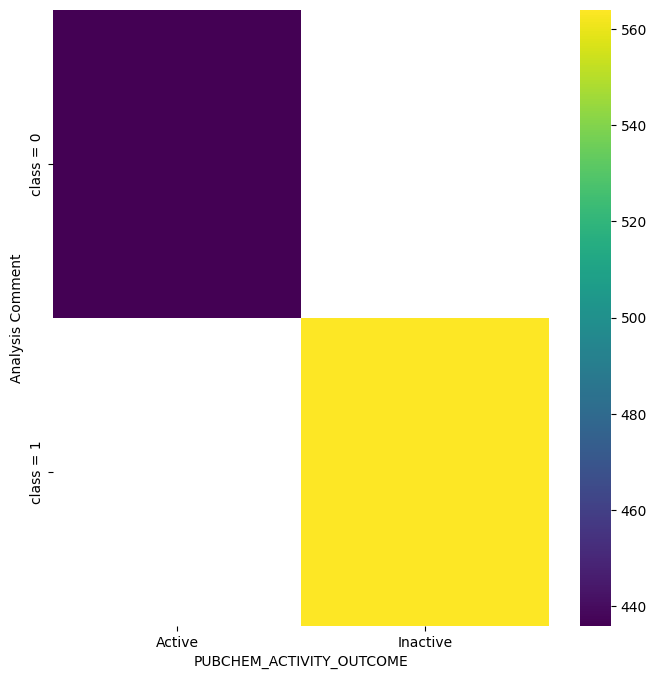

In [8]:
# @title PUBCHEM_ACTIVITY_OUTCOME vs Analysis Comment

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Analysis Comment'].value_counts()
    for x_label, grp in extracted_data.groupby('PUBCHEM_ACTIVITY_OUTCOME')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PUBCHEM_ACTIVITY_OUTCOME')
_ = plt.ylabel('Analysis Comment')

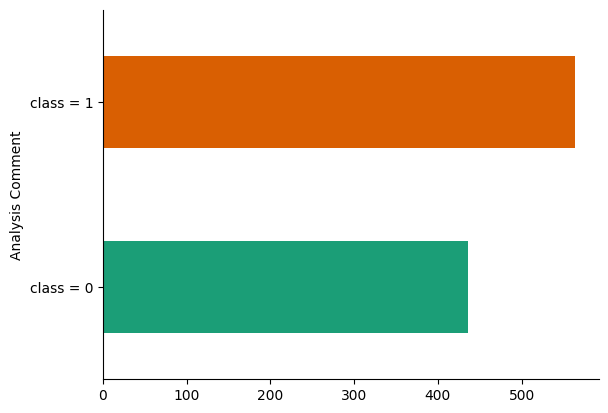

In [9]:
# @title Analysis Comment

from matplotlib import pyplot as plt
import seaborn as sns
extracted_data.groupby('Analysis Comment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

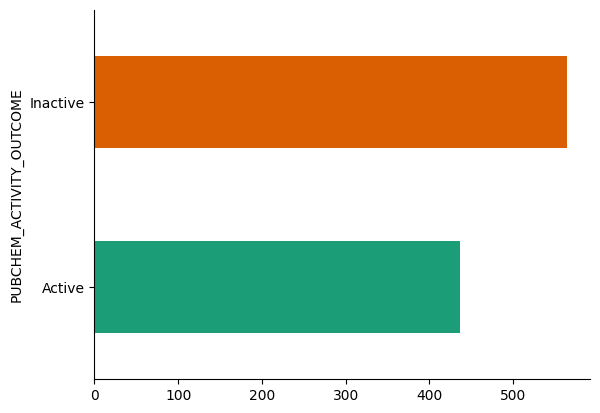

In [10]:
# @title PUBCHEM_ACTIVITY_OUTCOME

from matplotlib import pyplot as plt
import seaborn as sns
extracted_data.groupby('PUBCHEM_ACTIVITY_OUTCOME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2311 to 2064
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PUBCHEM_EXT_DATASOURCE_SMILES  1000 non-null   object
 1   PUBCHEM_ACTIVITY_OUTCOME       1000 non-null   object
 2   Analysis Comment               1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


### **Draw the molecular structure**

     |████████████████████████████████| 29.5 MB 109.5 MB/s 


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


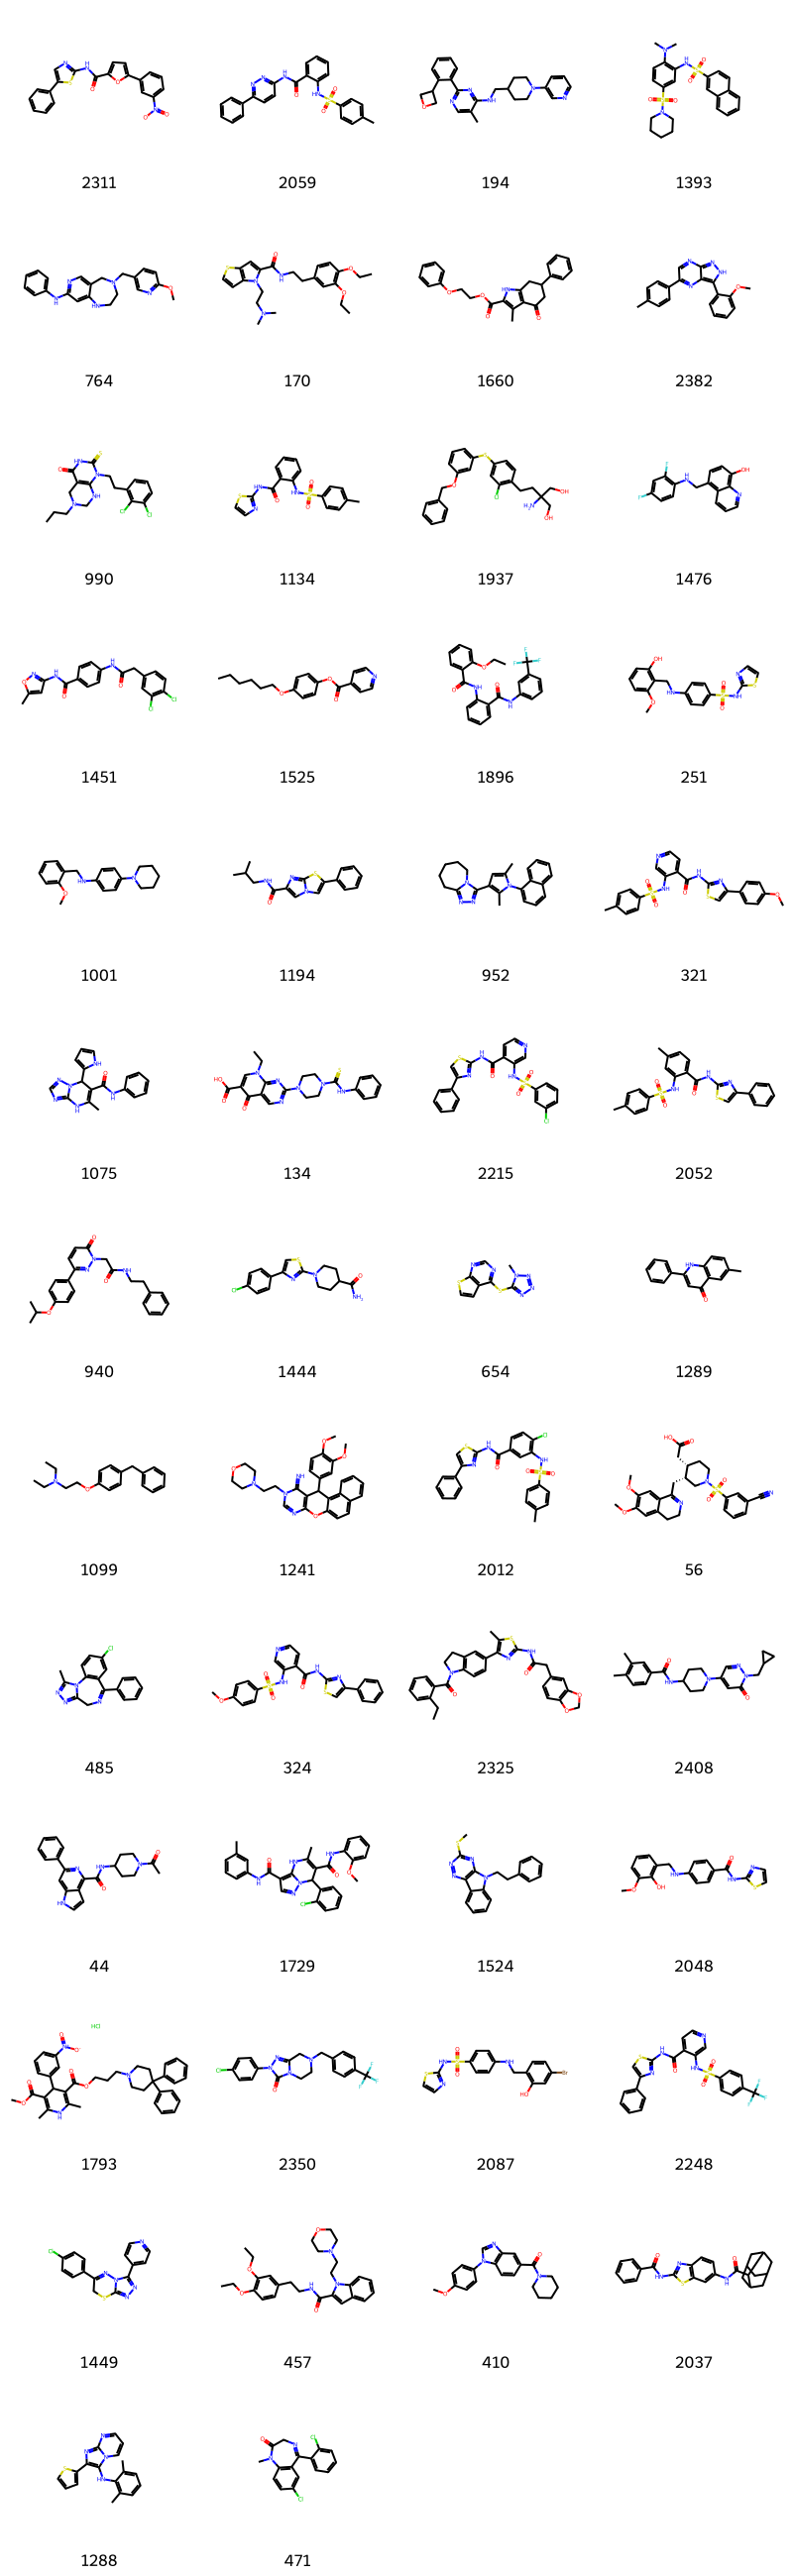

In [12]:
import pandas as pd
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
import math

# Assuming 'extracted_data' is your DataFrame
# Extract the SMILES column and molecule names
smiles_column = extracted_data['PUBCHEM_EXT_DATASOURCE_SMILES']
molecule_names = extracted_data.index.astype(str).tolist()  # Convert index to string list

# Convert SMILES to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_column]

# Draw molecular structures and convert them to images with names
molecule_images = []
for molecule, name in zip(molecules, molecule_names):
    molecule_image = Draw.MolToImage(molecule, size=(200, 200))
    molecule_image_with_name = Draw.MolsToGridImage([molecule], molsPerRow=1, legends=[name], subImgSize=(200,200))
    molecule_images.append(molecule_image_with_name)

# Display molecular images in a grid
num_images = len(molecule_images)
num_cols = 4  # Number of columns in the grid
num_rows = math.ceil(num_images / num_cols)  # Number of rows needed
grid_image = Draw.MolsToGridImage(molecules, molsPerRow=num_cols, subImgSize=(200, 200), legends=molecule_names)
display(grid_image)


In [13]:
!pip install standardiser

  Using cached standardiser-0.1.9.tar.gz (698 kB)
  Created wheel for standardiser: filename=standardiser-0.1.9-py3-none-any.whl size=720120 sha256=f5eadd883dcc2ce2a38c73170de8209d7e2e5c140f5ea6ba1230a1f089b0d7f3
  Stored in directory: /root/.cache/pip/wheels/a5/a7/b4/7f4ed7ad081547dfb4d9a52d6b69981b858d322c67ab27ae22
Successfully built standardiser


###**Convert to standard smiles**

In [14]:
import os

# Store the current working directory
original_path = os.getcwd()

# Change directory to '/content/drive/MyDrive/Colab Notebooks/model-validation-example/src'
os.chdir('/content/drive/MyDrive/Colab Notebooks/model-validation-example/src')

# In this codeblock, you're working in the '/src' directory
# Import and use the function standardise_smiles from /src
from smiles_processing import standardise_smiles
std_smiles_column = standardise_smiles(smiles_column)

# Now, let's return to the original directory
os.chdir(original_path)


### **Generate Inchikeys**

In [ ]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package
# Initialize a list to store InChIKeys
inchikeys = []

# Iterate through the standardized SMILES and convert them to molecules to get InChIKeys
for smiles in std_smiles_column:
    # Check if the smiles is a valid string
    if isinstance(smiles, str):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            inchikey = Chem.inchi.InchiToInchiKey(Chem.inchi.MolToInchi(mol))
            inchikeys.append(inchikey)
        else:
            # Handle if SMILES cannot be converted to a molecule
            inchikeys.append(None)
    else:
        # Handle if the value is not a string (e.g., NaN or float)
        inchikeys.append(None)

# Add the generated InChIKeys to your DataFrame or use them as needed


In [44]:
inchikeys[:10]

['KHIYANZJZPOERY-UHFFFAOYSA-N',
 'GOMHIKKLHZCVNL-UHFFFAOYSA-N',
 'DXCJUNQQRSOMOJ-UHFFFAOYSA-N',
 'YEVXRWLVKPEMJL-UHFFFAOYSA-N',
 'FPGCWSZCMSCZEJ-UHFFFAOYSA-N',
 'LTNDTGMLCTUNAS-UHFFFAOYSA-N',
 'VDKQVFWCRVGXRS-UHFFFAOYSA-N',
 'KJYQCXRQOTZFLE-UHFFFAOYSA-N',
 'DXDDWXHNWRDUCF-UHFFFAOYSA-N',
 'UODHIYDWUXTPFN-UHFFFAOYSA-N']

In [20]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns.
# All data will be saved with informative names in the /Inputs
# Create a DataFrame with std_smiles_column and inchikeys
data = {'SMILES': std_smiles_column, 'InChIKey': inchikeys}
smiles = {'SMILES': std_smiles_column}
df = pd.DataFrame(data)
df_smiles = pd.DataFrame(data)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/model-validation-example/Inputs/std_smiles_inchukey.csv')
df_smiles.to_csv('smiles.csv')

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [21]:
!ersilia serve $model_name
!ersilia run -i smiles.csv -o my_predictions_to_check_biase.csv

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos74bo: ncats-solubility

   URL: http://127.0.0.1:44503
   PID: 61554
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
my_predictions_to_check_biase.csv


In [22]:
outputs = pd.read_csv('my_predictions_to_check_biase.csv')

In [36]:
outputs.dropna()

,key,input,outcome,Fingerprint
0,KHIYANZJZPOERY-UHFFFAOYSA-N,O=C(Nc1ncc(-c2ccccc2)s1)c1ccc(-c2cccc([N+](=O)...,1.000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,GOMHIKKLHZCVNL-UHFFFAOYSA-N,Cc1ccc(S(=O)(=O)Nc2ccccc2C(=O)Nc2ccc(-c3ccccc3...,0.995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,DXCJUNQQRSOMOJ-UHFFFAOYSA-N,Cc1cnc(-c2ccccc2C2COC2)nc1NCC1CCN(c2cccnc2)CC1,0.002,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,YEVXRWLVKPEMJL-UHFFFAOYSA-N,CN(C)c1ccc(S(=O)(=O)N2CCCCC2)cc1NS(=O)(=O)c1cc...,0.996,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,FPGCWSZCMSCZEJ-UHFFFAOYSA-N,COc1ccc(CN2CCNc3cc(Nc4ccccc4)ncc3C2)cn1,0.001,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
995,JZRXMESSAQXLTF-UHFFFAOYSA-N,Cc1nn(CCc2nc(-c3ccccc3F)cs2)c2[nH]c(=O)cc(C(F)...,0.972,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
996,FPNSILJSOUWBKT-UHFFFAOYSA-N,Oc1ccc(-c2nc(C3CC3)nc3c2CCN(CC2CCCCC2)CC3)cc1,0.304,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
997,DTDPAXHZDSFXSR-UHFFFAOYSA-N,CCc1ccc(NC(=O)c2[nH]c(C)c(C(C)=O)c2C)cc1[S+](=...,0.928,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
998,BPVFEOBAXMBJQD-UHFFFAOYSA-N,Cc1cc(C)nc(NC(=S)N2CCN(c3ccc(C(F)(F)F)cc3Cl)CC...,0.997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [39]:
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

# Morgan Fingerprint function
def generate_fingerprint(smiles):
    mol = Chem.MolFromSmiles(str(smiles))
    if mol is not None:  # Check if molecule was successfully created
        finger_prints = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        array = np.zeros((1,), dtype=np.int8)
        Chem.DataStructs.ConvertToNumpyArray(finger_prints, array)
        return array
    else:
        return None  # Return None if molecule couldn't be created


# Assuming 'outputs' is your DataFrame containing input SMILES strings in a column named 'input'
outputs['Fingerprint'] = outputs['input'].apply(generate_fingerprint)

# Assuming 'outputs' is your DataFrame containing input SMILES strings in a column named 'input'
outputs_copy = outputs.copy()  # Make a copy of the DataFrame

# Apply fingerprint generation function
outputs_copy['Fingerprint'] = outputs_copy['input'].apply(generate_fingerprint)

# Drop rows with NaN values in the 'Fingerprint' column
outputs_copy.dropna(subset=['Fingerprint'], inplace=True)

# Perform PCA or any further analysis
fingerprints = np.vstack(outputs_copy['Fingerprint'])
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(fingerprints)
reduced_features


array([[ 1.02281929,  0.0370178 ],
       [ 3.3508413 ,  0.50965029],
       [-1.12143185, -0.20299061],
       ...,
       [-0.1081928 ,  0.21282484],
       [-0.92771641,  0.43618004],
       [-0.85066071, -0.83930032]])

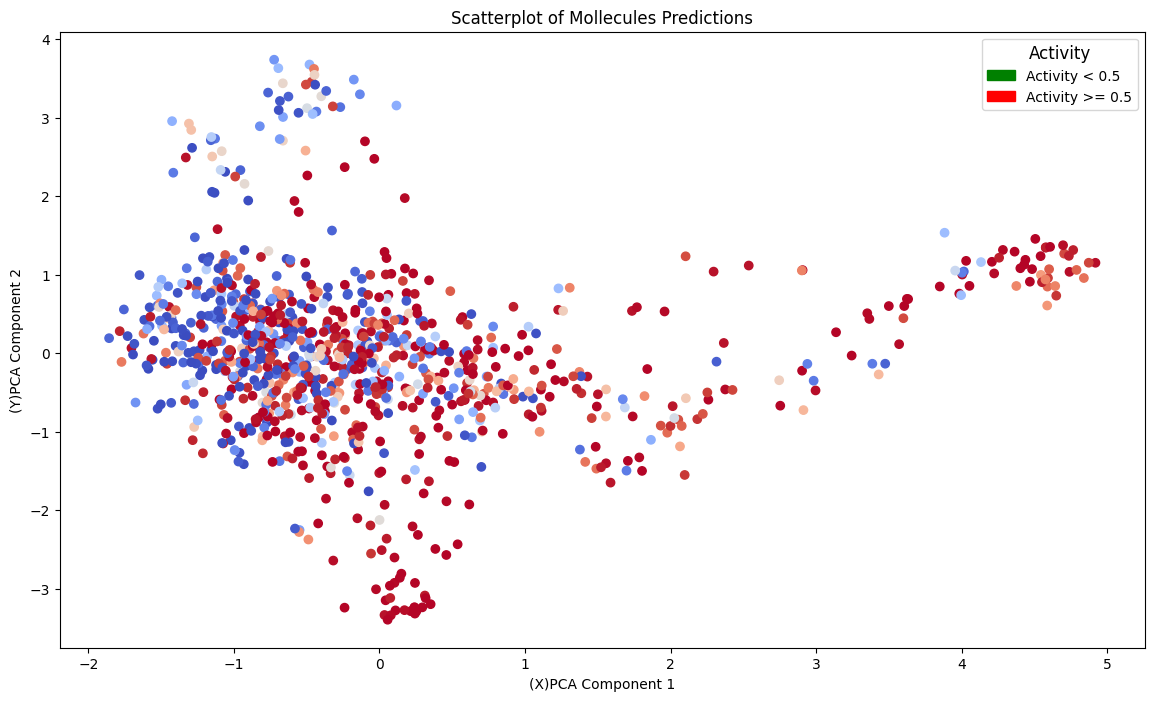

In [42]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def custom_norm(x):
    return 1 if x >= 0.5 else 0

# scatter plot with adjusted color points threshold
plt.figure(figsize=(14, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=outputs['outcome'], cmap='coolwarm', norm=mcolors.TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.5),)
plt.xlabel('(X)PCA Component 1')
plt.title('Scatterplot of Mollecules Predictions')
plt.ylabel('(Y)PCA Component 2')

legend_labels = ['Activity < 0.5', 'Activity >= 0.5']
legend_colors = ['green', 'red']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right', title='Activity', title_fontsize='large')

plt.savefig('scattter_plot.png')
plt.show()